# Network attacks - Detection

## I - Modules

In [7]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score,recall_score,roc_curve,roc_auc_score,ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np

## II - Charger donnée

Utilisons donnée préparée :

In [3]:
def load_data(size):
    if size=="full":
        df_normal = pd.read_csv("preparation/network_normal.csv")
        df_attack_1 = pd.read_csv("preparation/network_1.csv")
        df_attack_2 = pd.read_csv("preparation/network_2.csv")
        df_attack_3 = pd.read_csv("preparation/network_3.csv")
        df_attack_4 = pd.read_csv("preparation/network_4.csv")
    
    elif size=="half":
        df_normal = pd.read_csv("preparation/network_normal.csv", skiprows=lambda x: x % 2 == 0)
        df_attack_1 = pd.read_csv("preparation/network_1.csv", skiprows=lambda x: x % 2 == 0)
        df_attack_2 = pd.read_csv("preparation/network_2.csv", skiprows=lambda x: x % 2 == 0)
        df_attack_3 = pd.read_csv("preparation/network_3.csv", skiprows=lambda x: x % 2 == 0)
        df_attack_4 = pd.read_csv("preparation/network_4.csv", skiprows=lambda x: x % 2 == 0)
    
    elif size=="quarter":
        df_normal = pd.read_csv("preparation/network_normal.csv", skiprows=lambda x: x % 4 == 0)
        df_attack_1 = pd.read_csv("preparation/network_1.csv", skiprows=lambda x: x % 4 == 0)
        df_attack_2 = pd.read_csv("preparation/network_2.csv", skiprows=lambda x: x % 4 == 0)
        df_attack_3 = pd.read_csv("preparation/network_3.csv", skiprows=lambda x: x % 4 == 0)
        df_attack_4 = pd.read_csv("preparation/network_4.csv", skiprows=lambda x: x % 4 == 0)

In [5]:
load_data("full")

FileNotFoundError: [Errno 2] No such file or directory: 'preparation/network_normal.csv'

## III - Fonctions

### 1 - Matrice de confusion

In [4]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds,normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))

    labels_for_fig = [l[0:4]+'.' for l in labels]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels_for_fig)
    try:
        disp.plot(cmap="Blues", values_format="4f", ax=ax, colorbar=False)
    except:
        print(pd.unique(y_preds))
        print(pd.unique(y_true))
        print(labels)
    plt.title("Normalized confusion matrix")
    plt.show()

### 2 - KNN

In [5]:
def KNN_attack_detection(df):
    new_df = df.copy()
    print("taille",len(df))
    X = new_df.drop('label', axis=1)  # Caractéristiques
    y = new_df['label']  # Cible
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)


    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(list(y_pred), list(y_test))
    print("Précision du modèle KNN : {:.2f}%".format(accuracy * 100))
    plot_confusion_matrix(list(y_pred),list(y_test),knn_model.classes_)

### 3 - Random Forest

In [8]:
# Import the model we are using
# Instantiate model with 1000 decision trees


def randomForest_attack_detector(df):
    # Train the model on training data
    new_df = df.copy()
    n=0
    labels = pd.unique(new_df["label"])
    for label in pd.unique(new_df["label"]):
        new_df["label"]=new_df['label'].replace(label, n)
        n+=1
    X = new_df.drop('label', axis=1)  # Caractéristiques
    y = new_df['label']  # Cible
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    
    rf = RandomForestRegressor(n_estimators = 5, random_state = 42)
    rf.fit(X_train, y_train)

    print(pd.unique(y_test))

    y_pred = np.round(rf.predict(X_test))
    accuracy = accuracy_score(list(y_pred), list(y_test))
    print("Accuracy du modèle KNN : {:.2f}%".format(accuracy * 100))
    plot_confusion_matrix(list(y_pred),list(y_test),labels)

## IV - Detection

### 1 - KNN

taille 5526894
Précision du modèle KNN : 100.00%


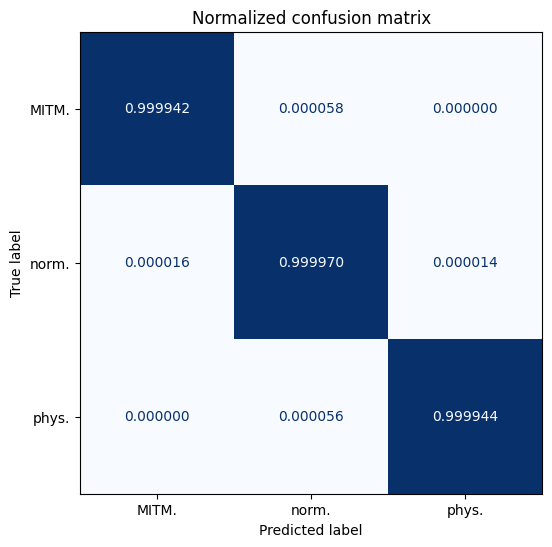

In [17]:
KNN_attack_detection(df_attack_1)

taille 4774086
Précision du modèle KNN : 100.00%


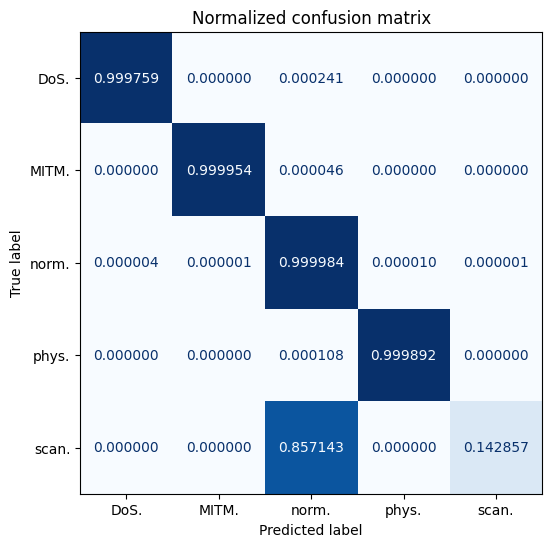

In [18]:
KNN_attack_detection(df_attack_2)

taille 2795710
Précision du modèle KNN : 99.99%


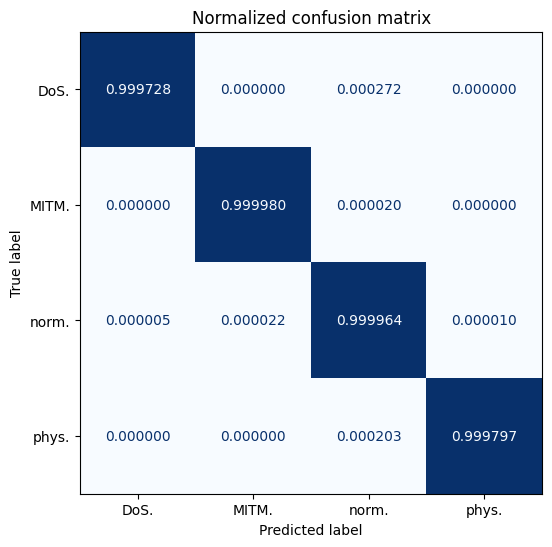

In [19]:
KNN_attack_detection(df_attack_3)

taille 4350185
Précision du modèle KNN : 100.00%


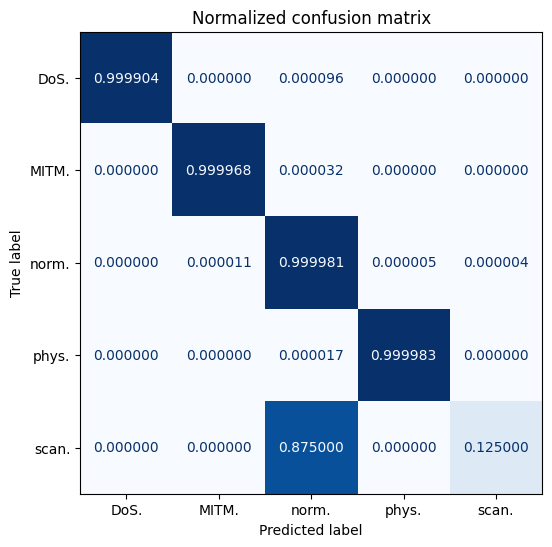

In [20]:
KNN_attack_detection(df_attack_4)

taille 17446875
Précision du modèle KNN : 99.71%


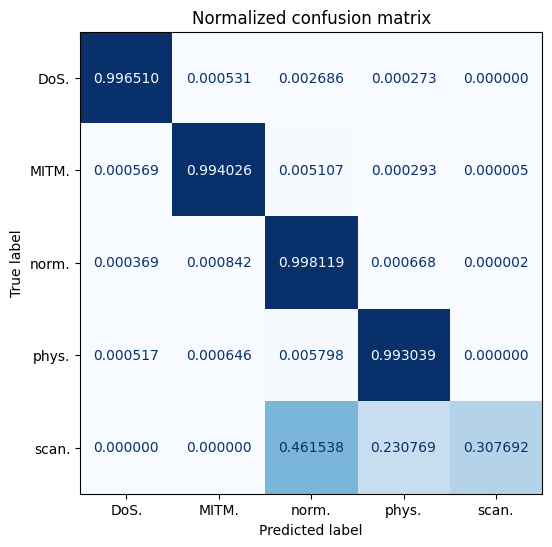

In [21]:
KNN_attack_detection(pd.concat([df_attack_1,df_attack_2,df_attack_3,df_attack_4]))

taille 25204164
Précision du modèle KNN : 99.74%


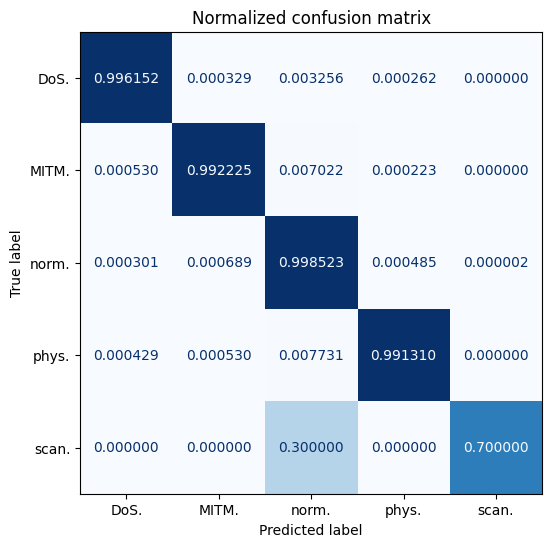

In [22]:
KNN_attack_detection(pd.concat([df_normal,df_attack_1,df_attack_2,df_attack_3,df_attack_4]))

### 2 - Random forest

[0 1 2]
Accuracy du modèle KNN : 100.00%


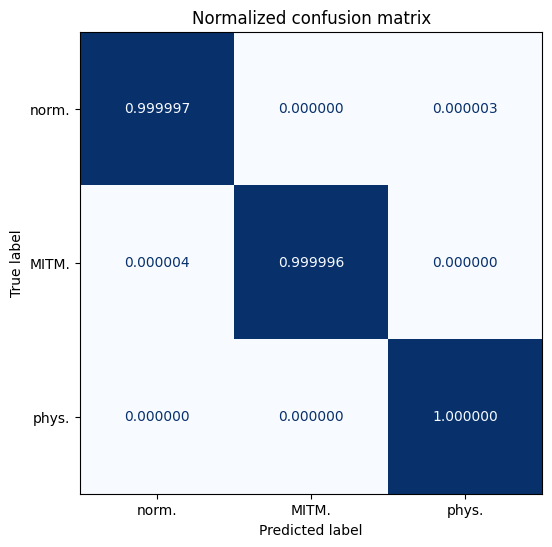

In [9]:
randomForest_attack_detector(df_attack_)

In [10]:
randomForest_attack_detector(pd.concat([df_normal,df_attack_1,df_attack_2,df_attack_3,df_attack_4]))